/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


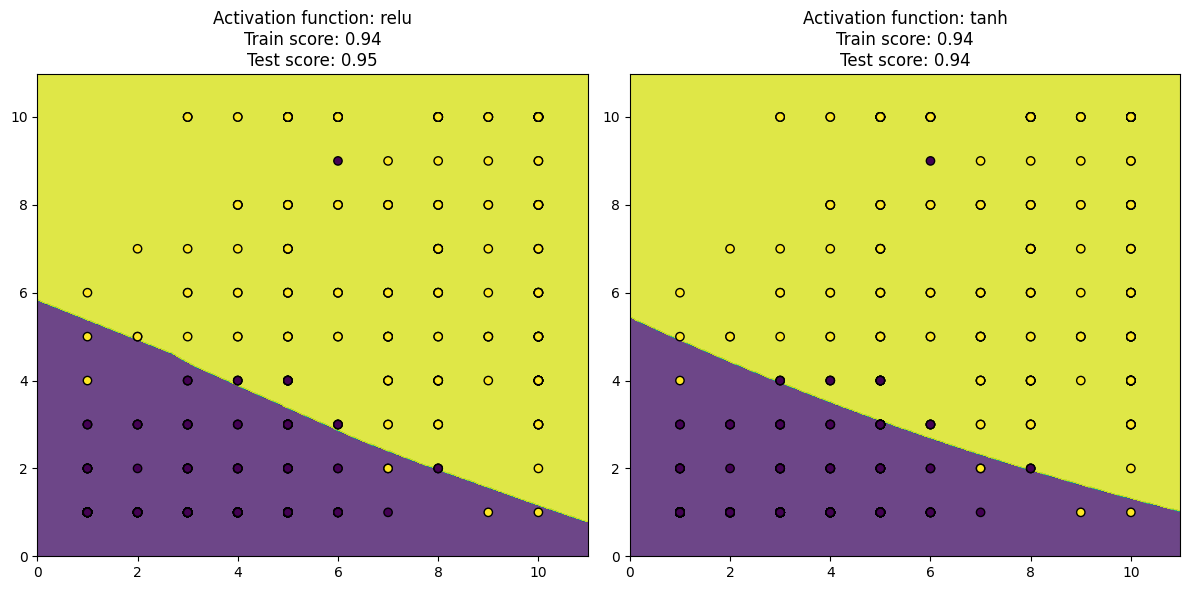

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('cell_samples (1).csv')
def reemplazar_simbolo(df):
    for columna in df.columns:
        if df[columna].dtype == 'object':  # Si es una columna de strings
            # Identificar filas que contienen el símbolo ?
            indices_con_simbolo = df[columna].str.contains('[^\w\s]', regex=True)

            # Si hay alguna fila con el símbolo ?
            if indices_con_simbolo.sum() > 0:
                # Convertir la columna a numérica, para poder calcular min y max
                # Aquí los errores='coerce' es para transformar valores no numéricos a NaN
                columna_numerica = pd.to_numeric(df[columna], errors='coerce')

                minimo = columna_numerica.min()
                maximo = columna_numerica.max()

                # Para cada fila con el símbolo ?, generamos un número aleatorio entre min y max
                df.loc[indices_con_simbolo, columna] = np.random.randint(minimo, maximo, size=indices_con_simbolo.sum())

    return df

data = reemplazar_simbolo(df)
#
X = data.drop(['Class'], axis=1)
X = X.iloc[:, :2]
y = data["Class"]


# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define a function to plot decision boundary and scores
def plot_decision_boundary(model, X, y, ax):
    h = .02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k')
    ax.set_title(f'Activation function: {model.activation}\n'
                 f'Train score: {accuracy_score(y_train, model.predict(X_train)):.2f}\n'
                 f'Test score: {accuracy_score(y_test, model.predict(X_test)):.2f}')

# Activation functions to evaluate
activations = ['relu', 'tanh']

# Plot setup
fig, axes = plt.subplots(1, len(activations), figsize=(12, 6))

# 3. Train the neural network and plot
for ax, activation in zip(axes, activations):
    mlp = MLPClassifier(hidden_layer_sizes=(5, 50), max_iter=1000,activation=activation, random_state=0)
    mlp.fit(X_train, y_train)

    # 4. Plot the decision boundary
    plot_decision_boundary(mlp, X, y, ax)

plt.tight_layout()
plt.show()
